In [121]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime


In [122]:
import requests as re
import re # for regex
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
from transformers import BertTokenizer, BertForSequenceClassification
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence


[nltk_data] Downloading package wordnet to /home/andsilva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [124]:
now = datetime.now()
 
print("date..............:", now)

date..............: 2023-05-19 19:08:04.141326


In [125]:
#### https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
df_reviews = pd.read_csv('../dataset/Reviews.csv') # full dataset
#df_reviews = pd.read_csv('../dataset/out.csv') # small part of the dataset

# dataset size:
print(f'Numero de linha: {df_reviews.shape[0]}, numero de colunas: {df_reviews.shape[1]}') 

Numero de linha: 568454, numero de colunas: 10


In [126]:
######## parte do dataset
df_reviews_small = df_reviews.copy()
df_reviews = df_reviews_small.sample(1000) # FIXME remover no final

In [127]:
# Lista valores faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [128]:
# dataset - tamanho
df_reviews.shape

(1000, 10)

In [129]:
# retirar linha com valores faltantes
df_reviews = df_reviews.dropna()

In [130]:
# checar numero de linha faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [131]:
df_reviews.shape

(1000, 10)

In [132]:
# retirar os neutros.
df_reviews = df_reviews[df_reviews['Score'] != 3]

In [133]:
df_reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
239285,239286,B001F1SAPA,A15YB0DWQ815SY,"Susan Schenck ""award-winning author of two books""",3,4,5,1303689600,Best coffee substitue---ever!,I've tried nearly every coffee substitute and...
97214,97215,B0011MAQ6O,A268YUI4HOUKB,Kathie,0,0,5,1303776000,not bad at all.,"In the Gluten free world, there isn't much to ..."
93854,93855,B003X0NXJO,A146ME6317JTJH,nancy,3,3,5,1313712000,Fan of PLAIN Puffins,I will order Puffins because I have tried it a...


In [134]:
# lista a quantidade de cada categoria de score.
df_reviews['Score'].value_counts()

5    649
4    142
1     88
2     62
Name: Score, dtype: int64

In [135]:
# redefinir score
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "0"
    #elif label == 3.0:
    #    return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "1"
df_reviews['negative'] = df_reviews["Score"].apply(sentiment)

In [136]:
df_reviews["negative"].value_counts()

0    791
1    150
Name: negative, dtype: int64

In [137]:
#Mude df5 para df3 para pegar toda base
texts = df_reviews['Text'].sum()
texts[0:1000]

"I've  tried nearly every coffee substitute and this is the only one that competes with coffee in flavor. I esp. like the vanilla flavor. This stuff is not only good tasting, but alkalizing! That means it is actually GOOD for you!In the Gluten free world, there isn't much to choose from that's worth eating twice. This stuff isn't too bad.I will order Puffins because I have tried it and it is only at Target here.  PLEASE DO NOT DISCONTINUE THE PLAIN.  I don't like fruit, honey, peanutbutter, cinnanamon or other flavored cereal, but like puffs.  I have trouble with alot of cereal because of dentures.  For years and years I got Quaker Corn Bran but they added cinnamon and I don't like it.  Of, course, I want fiber, low sugar, calories.  Thank youThese are GREAT for carrying in my purse for eating out, or when we're traveling, as most places do not have Agave Nectar!<br />Just wish there was an easier way to open them...I'm carrying a small pair of scissors to open them!To start, I did rec

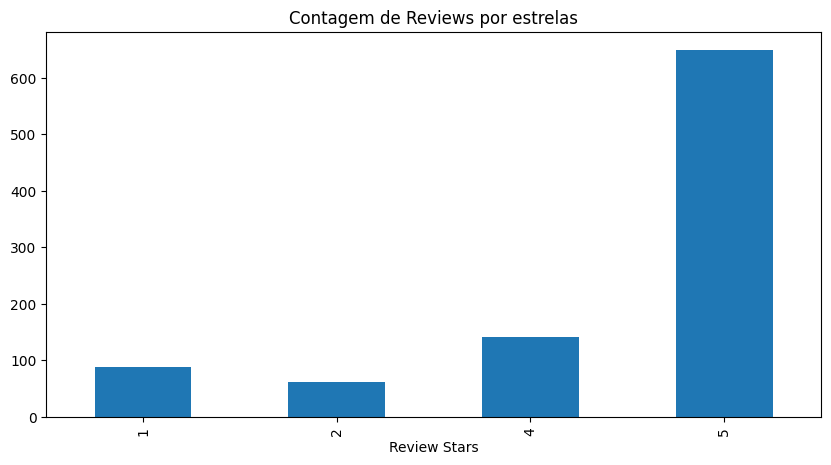

In [138]:
ax = df_reviews['Score'].value_counts().sort_index().plot(kind='bar',
                                                  title='Contagem de Reviews por estrelas',
                                                  figsize=(10, 5)
                                                 )

ax.set_xlabel('Review Stars')
plt.show()

In [139]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords_pa = stop_en + stop_pt
stopwords_pa.extend(['-',''])

In [140]:
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]


In [141]:
# lista de palavras do Text 'reviews'
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords_pa]
freqdist = Counter(list_words)
dict(freqdist.most_common(10))

{'like': 406,
 'br': 361,
 'good': 297,
 'one': 274,
 'coffee': 252,
 'great': 252,
 'taste': 241,
 'flavor': 225,
 'love': 214,
 'would': 213}

In [142]:
from wordcloud import WordCloud
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

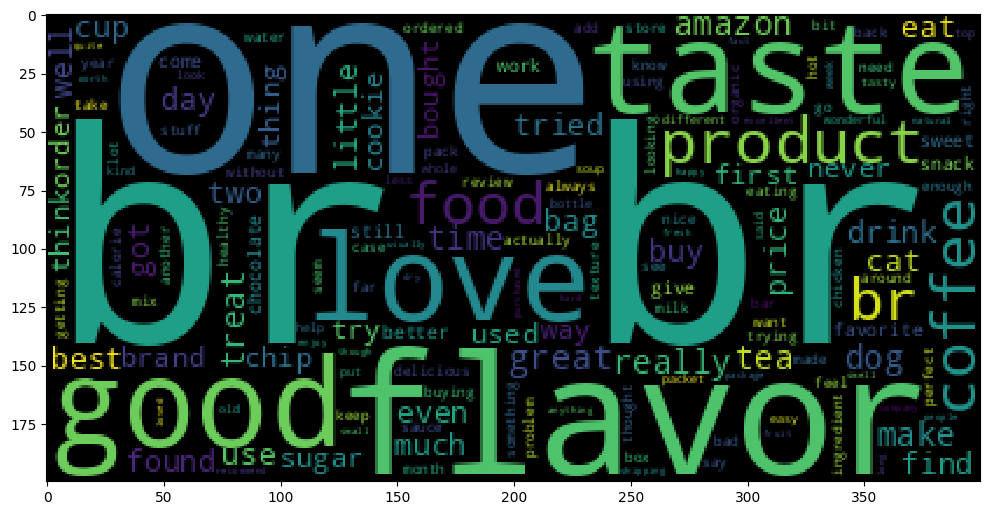

In [143]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

In [144]:
freq_common_works = dict(freqdist.most_common(10))
freq_common_works

{'like': 406,
 'br': 361,
 'good': 297,
 'one': 274,
 'coffee': 252,
 'great': 252,
 'taste': 241,
 'flavor': 225,
 'love': 214,
 'would': 213}

In [145]:
common_words = list(freq_common_works.keys())
common_words = common_words[0:4]

In [146]:
dispersion_words = common_words
plt.figure(figsize=(16,6))
#nltk_text.dispersion_plot(dispersion_words)

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

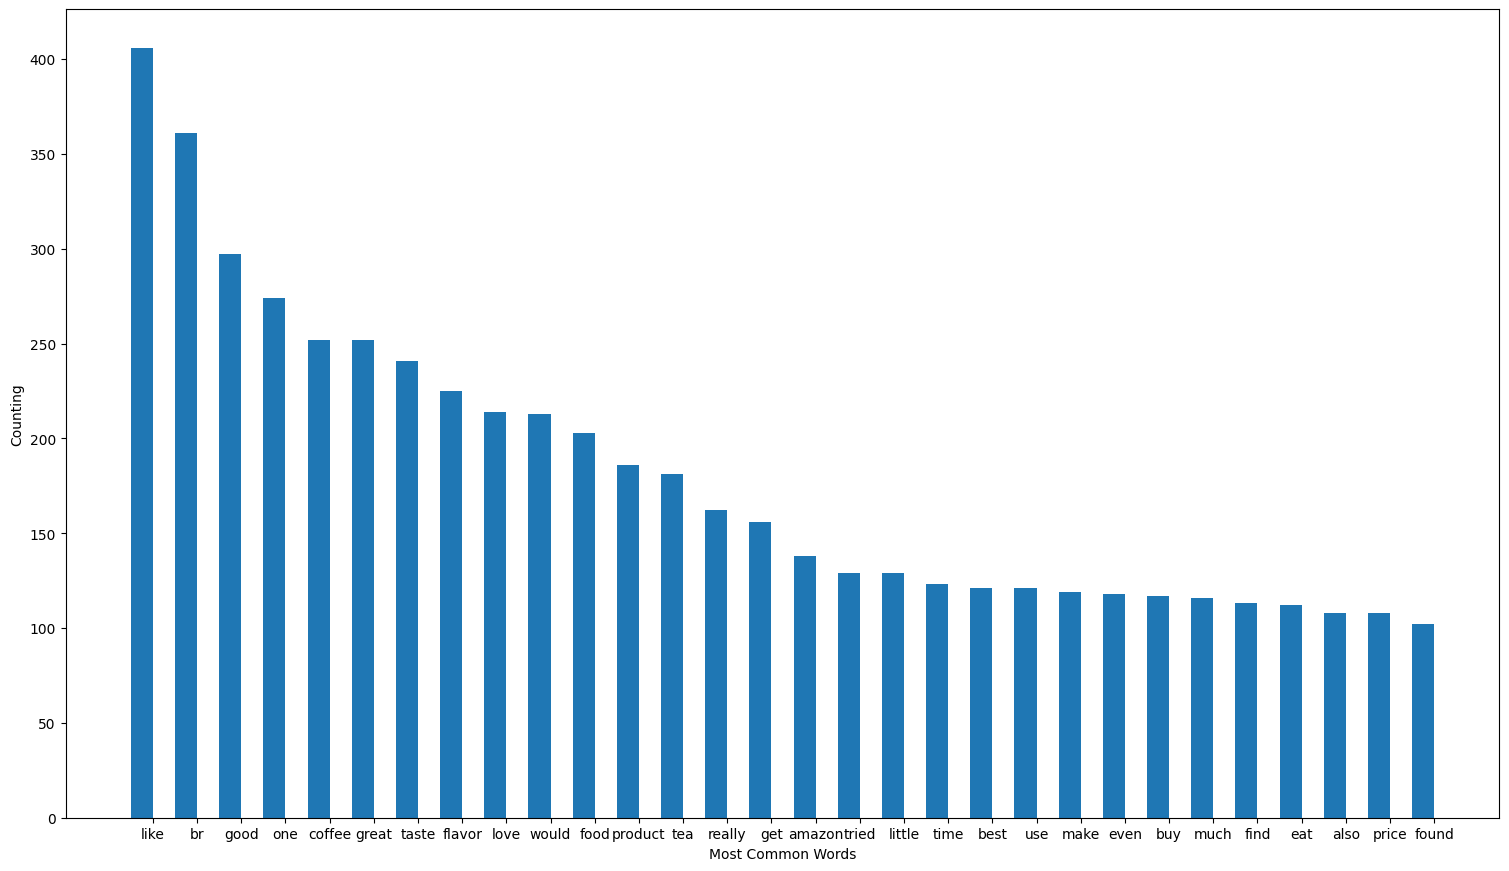

In [147]:
labels, values = zip(*freqdist.most_common(30))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('Most Common Words') 
plt.ylabel('Counting') 
plt.show()

### Data Preparation

In [148]:
# remove tags html
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df_reviews['Text'] = df_reviews['Text'].apply(clean)

In [149]:
# remover caracteres especiais
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df_reviews['Text'] = df_reviews['Text'].apply(is_special)

In [150]:
# Converter - lowercase
def to_lower(text):
    return text.lower()

df_reviews['Text'] = df_reviews['Text'].apply(to_lower)

In [151]:
nltk.download('stopwords')
nltk.download('punkt')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df_reviews['Text'] = df_reviews['Text'].apply(rem_stopwords)
#df_reviews['Text']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [152]:
def stem_txt(text):
    ss = SnowballStemmer('english') #tem portugues também
    return " ".join([ss.stem(w) for w in text])

df_reviews['Text'] = df_reviews['Text'].apply(stem_txt)
#df_reviews['Text']

In [153]:
df_reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'negative'],
      dtype='object')

In [154]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 239285 to 175749
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      941 non-null    int64 
 1   ProductId               941 non-null    object
 2   UserId                  941 non-null    object
 3   ProfileName             941 non-null    object
 4   HelpfulnessNumerator    941 non-null    int64 
 5   HelpfulnessDenominator  941 non-null    int64 
 6   Score                   941 non-null    int64 
 7   Time                    941 non-null    int64 
 8   Summary                 941 non-null    object
 9   Text                    941 non-null    object
 10  negative                941 non-null    object
dtypes: int64(5), object(6)
memory usage: 88.2+ KB


In [155]:
df_reviews['Text']

239285    tri near everi coffe substitut one compet coff...
97214     gluten free world much choos worth eat twice s...
93854     order puffin tri target pleas discontinu plain...
42707     great carri purs eat travel place agav nectar ...
57073     start receiv sampler bzzagent alreadi purchas ...
                                ...                        
554091    make espresso krup machin cafe lavazza compari...
127155    could find hot sour soup anywher groceri store...
46572     weight watcher sinc june 24th year success los...
218828    even though common commerci brand famili favor...
175749    came use everi day mix club soda touch tonic w...
Name: Text, Length: 941, dtype: object

In [156]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [157]:
df_reviews['Text'] = df_reviews['Text'].apply(preprocess_text)
df_reviews['Text']

239285    tri near everi coffe substitut one compet coff...
97214     gluten free world much choos worth eat twice s...
93854     order puffin tri target plea discontinu plain ...
42707     great carri purs eat travel place agav nectar ...
57073     start receiv sampler bzzagent alreadi purchas ...
                                ...                        
554091    make espresso krup machin cafe lavazza compari...
127155    could find hot sour soup anywher groceri store...
46572     weight watcher sinc june 24th year success los...
218828    even though common commerci brand famili favor...
175749    came use everi day mix club soda touch tonic w...
Name: Text, Length: 941, dtype: object

In [158]:
X = df_reviews['Text']
y = df_reviews['negative']

In [159]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=0)

In [160]:
# Set the parameters
max_features = 5000  # Maximum number of words to keep
max_length = 300  # Maximum length of each review
batch_size = 64
epochs = 10

In [162]:
# Build the model
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

2023-05-19 19:08:50.489420: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-19 19:08:50.489465: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (udesk): /proc/driver/nvidia/version does not exist
2023-05-19 19:08:50.501614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [163]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [164]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [165]:
# Train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10


2023-05-19 19:10:09.204086: W tensorflow/core/framework/op_kernel.cc:1807] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node 'sequential/Cast' defined at (most recent call last):
    File "/usr/local/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/local/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/andsilva/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/andsilva/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/andsilva/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/andsilva/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/local/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/local/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/usr/local/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/andsilva/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/andsilva/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/andsilva/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/andsilva/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/andsilva/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/andsilva/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/andsilva/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/home/andsilva/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/home/andsilva/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/andsilva/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/andsilva/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/andsilva/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_342019/32320278.py", line 2, in <module>
      model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/engine/sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 650, in _run_internal_graph
      y = self._conform_to_reference_input(y, ref_input=x)
    File "/home/andsilva/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 762, in _conform_to_reference_input
      tensor = tf.cast(tensor, dtype=ref_input.dtype)
Node: 'sequential/Cast'
Cast string to float is not supported
	 [[{{node sequential/Cast}}]] [Op:__inference_train_function_4321]